In [1]:
import pandas as pd
import math
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from confusion_matrix import plot_confusion_matrix
from metrics import score

In [23]:
dataframe = pd.read_csv(r"data/acath.txt",sep='\t')

# Filtrar los NaN
dataframe = dataframe[dataframe['choleste'].notnull()]

In [28]:
mean_chole = np.mean(list(filter(lambda x: not math.isnan(x), list(dataframe['choleste']))))
mean_chole


[]

In [17]:
"""dataframe = dataframe.transform({ 
    'sex': lambda x: x,
    'age': lambda x: x,
    'cad.dur': lambda x: x,
    'choleste': lambda x: mean_chole if math.isnan(x) else x,
    'sigdz': lambda x: x,
})"""

dataframe.head()

""
0
1
2
3
4


### Separamos los datos en train y test

In [5]:
TEST_SIZE = 0.4

X = dataframe[['age', 'cad.dur', 'choleste']].values.tolist()
# X = preprocessing.scale(X) 
y = list(map(lambda x: x[0], dataframe[['sigdz']].values.tolist()))

Xp = X

X = [x for (x,yy) in zip(Xp,y) if not math.isnan(x[2])] 
y = [yy for (x,yy) in zip(Xp,y) if not math.isnan(x[2])] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=0)

### Ajustamos el modelo con los datos. No usamos el atributo 'sex'

In [6]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Matriz de confusion

Podemos ver que
 - Hay una alta tasa de falsos positivos (pesima recall en la clase 0)
 - Sin embargo la tasa de falsos negativos es baja (buen recall en la clase 1)

* Class: 0
Accuracy 0.66814 | Precision 0.75926 | Recall 0.12500 | TP-rate 0.12500 | FP-rate 0.02257 | F1 0.21466 

* Class: 1
Accuracy 0.66814 | Precision 0.66235 | Recall 0.97743 | TP-rate 0.97743 | FP-rate 0.87500 | F1 0.78962 

HARMONIC MEANS

    Accuracy: 0.66814
    Precision: 0.70750
    Recall: 0.22165
    TP rate: 0.22165
    FP rate: 0.04400
    F1 score: 0.33755


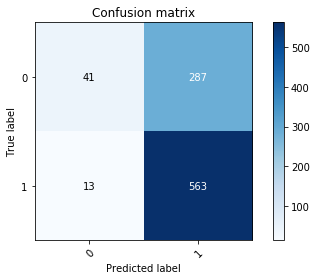

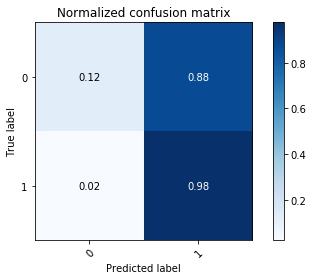

In [7]:
y_pred = lr.predict(X_test)
score(lr, [[x] for x in X_test], [[y] for y in y_test], classes = [0, 1], confusion_matrix=True)
plot_confusion_matrix(y_test, y_pred, classes=[0, 1], normalize=True)

### Utilizando  el  modelo  anterior  calcular  la  probabilidad  de  que  una  persona  tenga estrechamiento arterial si el colesterol es de 199, la edad es de 60 años y la duraciónes de 2 días


In [8]:
case = [[60, 2, 199]]

p = lr.predict_proba(case);
print("Probabilidad de estrechamiento: ", p[0][1])

Probabilidad de estrechamiento:  0.7358480208893765


# Ejercicios repetidos usando sexo como atributo

In [9]:
TEST_SIZE = 0.4

Xs = dataframe[['sex', 'age', 'cad.dur', 'choleste']].values.tolist()
# X = preprocessing.scale(X) 
ys = list(map(lambda x: x[0], dataframe[['sigdz']].values.tolist()))
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=TEST_SIZE, random_state=0)

### Mejora apenas la precisión, pero notablemente la recall en la clase 1 (a expensas de recall en la clase 2), aunque sigue siendo mala

In [10]:
lrs = LogisticRegression()
lrs.fit(Xs_train, ys_train)
ys_pred = lrs.predict(Xs_test)
score(lrs, [[x] for x in Xs_test], [[y] for y in ys_test], classes = [0, 1], confusion_matrix=True)
plot_confusion_matrix(ys_test, ys_pred, classes=[0, 1], normalize=True)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Utilizando  el  modelo  anterior  calcular  la  probabilidad  de  que  una  persona  tenga
# estrechamiento arterial si el colesterol es de 199, la edad es de 60 años y la duraciónes de 2 días
case = [[0, 60, 2, 199],
        [0.5, 60, 2, 199],
        [1, 60, 2, 199]
       ]

p = lrs.predict_proba(case);
print("Considerando que es hombre: ", p[0][1])
print("Considerando que es mujer: ", p[2][1])
print("Considerando sexo incierto (=0.5): ", p[1][1])

# Usando K-NN

In [ ]:
from KNNClassifier import KNNClassifier

In [ ]:
K = 5
knn = KNNClassifier(K = K)
knn.fit(X_train, y_train)

### Obtenemos resultados "peores" prácticamente hablando pues aumenta la tasa de falsos negativos

In [ ]:
score(knn, X_test, y_test, classes = [0, 1], confusion_matrix=True)

# Clusterizando con K-Medias

In [ ]:
from kmeans import kmeans
clustered = kmeans(X, 2)

In [ ]:
cluster0 = [x[0] for x in clustered if x[1]==0]
cluster1 = [x[0] for x in clustered if x[1]==1]

## Resultado de K-Medias:

In [ ]:
%matplotlib notebook
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
xs = [x[0] for x in cluster0]
ys = [x[1] for x in cluster0]
zs = [x[2] for x in cluster0]
ax.scatter(xs, ys, zs, c='g', s=1.5)
xs = [x[0] for x in cluster1]
ys = [x[1] for x in cluster1]
zs = [x[2] for x in cluster1]
ax.scatter(xs, ys, zs, c='r', s=1.5)
ax.legend(loc='best')

plt.show()

## Observando el solapamiento de las clases, no parece un problema apropiado para K-Medias

In [ ]:
%matplotlib notebook
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
xs = [x[0][0] for x in zip(X,y) if x[1] == 1]
ys = [x[0][1] for x in zip(X,y) if x[1] == 1]
zs = [x[0][2] for x in zip(X,y) if x[1] == 1]
ax.scatter(xs, ys, zs, c='g', s=1.5)
xs = [x[0][0] for x in zip(X,y) if x[1] == 0]
ys = [x[0][1] for x in zip(X,y) if x[1] == 0]
zs = [x[0][2] for x in zip(X,y) if x[1] == 0]
ax.scatter(xs, ys, zs, c='r', s=1.5)
ax.legend(loc='best')

plt.show()